## 0 준비
  - 01 import
  - 02 pd.read_
  - 03 데이터 병합
  
## 1 데이터 조정
  - 11 결측값
  - 12 이상치
  - 13 잘못입력
  - 14 익명화된 정보
  
## 2피쳐 엔지니어링
  - 원핫인코딩 / 라벨인코딩
  - test 셋

## 3 EDA
## 4 학습
  - 41 split data
  - 42 model = 
  - 43 model.fit(X,y)
  
## 5 예측

# Titanic: Machine Learning from Disaster

# 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
# 그래프 문자 깨지는 것 대처
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv('data/train.csv', index_col=['PassengerId'])
print(train.shape)
train.head(10)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [4]:
test = pd.read_csv('data/test.csv', index_col=['PassengerId'])
print(test.shape)
test.head(10)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


# 데이터 조정&피쳐 엔지니어링

### 칼럼별 null값 확인 및 처리

null값 처리해야할 열
- (1)Age
- Cabin (x)
- (2)Embarked

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

열 unique값 확인

In [6]:
train.Survived.unique()

array([1, 0], dtype=int64)

In [7]:
train.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [8]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
train.SibSp.unique()

array([0, 1, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

## (1) Fare 전처리 -> 연속변수이므로 distplot으로 이상치를 보자

## Fare 100 이상은 이상치 -> 제거

C:\Users\runia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


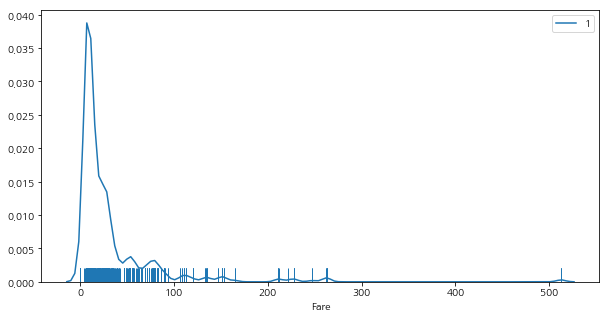

In [13]:
# sns.distplot(train['Fare'], hist=False)
plt.subplots(figsize=(10,5))
sns.distplot(train.Fare, hist=False, label='1', kde=True, rug=True)

In [14]:
train = train[train['Fare']<100]

In [15]:
print(train.shape)
train.head(10)

(838, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


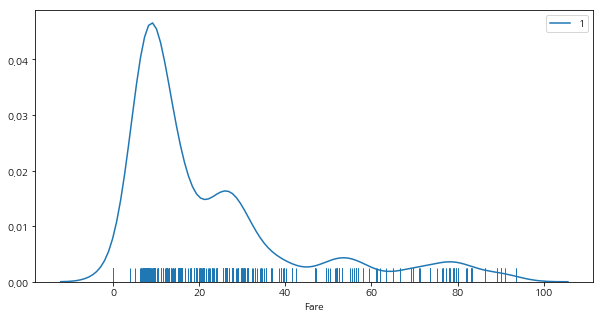

In [16]:
# sns.distplot(train['Fare'], hist=False)
plt.subplots(figsize=(10,5))
sns.distplot(train.Fare, hist=False, label='1', kde=True, rug=True)

In [17]:
survived = train[train['Survived']==1]
dead = train[train['Survived']==0]

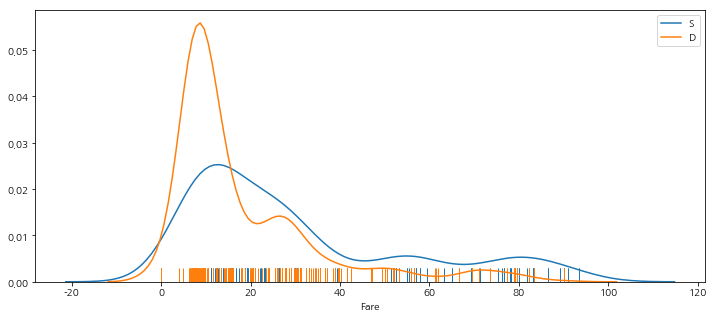

In [18]:
plt.subplots(figsize=(12,5))
sns.distplot(survived.Fare, hist=False, label='S', kde=True, rug=True)
sns.distplot(dead.Fare, hist=False, label='D', kde=True, rug=True)

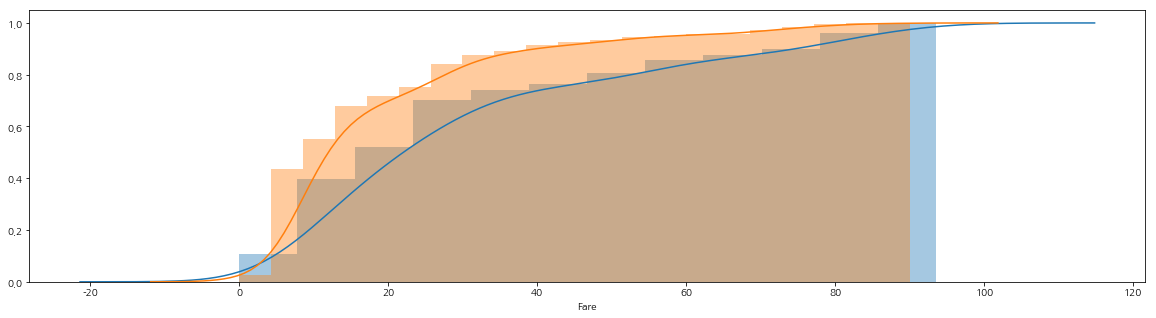

In [19]:
plt.subplots(figsize=(20,5))
sns.distplot(survived.Fare,
              hist_kws=dict(cumulative=True),
              kde_kws=dict(cumulative=True))
sns.distplot(dead.Fare,
              hist_kws=dict(cumulative=True),
              kde_kws=dict(cumulative=True))

In [20]:
# Fare 원핫인코딩
train['inexst'] = train['Fare']<10.5
train['inex'] = (train['Fare']>=10.5) & (train['Fare']<80)
train['ex'] = train['Fare']>=80

train[['inexst', 'inex', 'ex']].head()

,inexst,inex,ex
PassengerId,,,
430,True,False,False
752,False,True,False
824,False,True,False
129,False,True,False
700,True,False,False


In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inexst,inex,ex
PassengerId,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,True,False,False
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,False,True,False
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S,False,True,False
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,False,True,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,True,False,False


### (2) Age null값 채우기 / 범주화 -> 원핫인코딩

### Age를 유추할 독립변수 찾기 -> 히트맵 이용 -> Pclass가 가장 상관관계가 높다. Pclass별 평균값으로 Age를 넣자.

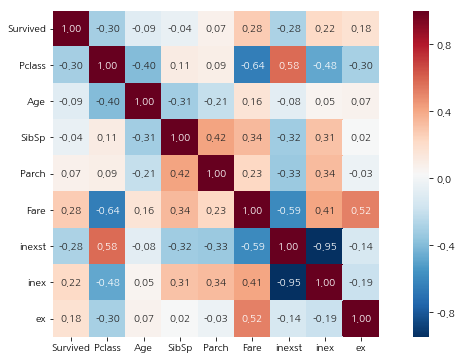

In [22]:
fig=plt.gcf()
fig.set_size_inches(12,6)
sns.heatmap(train.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

### Age의 null값을 채워보자 - ★groupby 사용 (Pclass 조건별로 평균값으로 채워넣기)

In [23]:
# (1) Pclass별 평균값 구하기 - groupby 이용 통계값 구하기
mean_by_P = train.groupby('Pclass')['Age'].mean()

In [24]:
mean_by_P

Pclass
1    40.416667
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [25]:
# (2) Age null값에 Pclass별로 평균값 넣기
train.loc[(train.Age.isnull())&(train.Pclass==1), 'Age'] = mean_by_P[1]
train.loc[(train.Age.isnull())&(train.Pclass==2), 'Age'] = mean_by_P[2]
train.loc[(train.Age.isnull())&(train.Pclass==3), 'Age'] = mean_by_P[3]

In [26]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inexst,inex,ex
PassengerId,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00000,0,0,SOTON/O.Q. 392078,8.0500,E10,S,True,False,False
752,1,3,"Moor, Master. Meier",male,6.00000,0,1,392096,12.4750,E121,S,False,True,False
824,1,3,"Moor, Mrs. (Beila)",female,27.00000,0,1,392096,12.4750,E121,S,False,True,False
129,1,3,"Peter, Miss. Anna",female,25.14062,1,1,2668,22.3583,F E69,C,False,True,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00000,0,0,348121,7.6500,F G63,S,True,False,False
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00000,0,0,348123,7.6500,F G73,S,True,False,False
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.00000,0,0,348124,7.6500,F G73,S,True,False,False
777,0,3,"Tobin, Mr. Roger",male,25.14062,0,0,383121,7.7500,F38,Q,True,False,False
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00000,1,1,PP 9549,16.7000,G6,S,False,True,False


In [27]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       677
Embarked      0
inexst        0
inex          0
ex            0
dtype: int64

### => Age null값 처리 완료

### 원핫인코딩을 위해 Age의 생존, 사망 각각의 distplot분포를 바탕으로 범주를 나눠보자

C:\Users\runia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\runia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


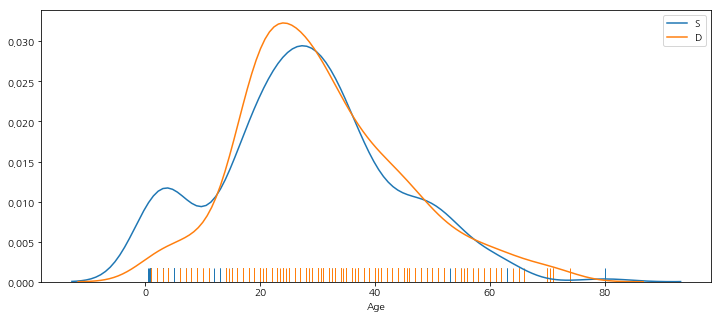

In [28]:
# sns.distplot(dead['Age'], hist=False,label='D',kde=True, rug=True)
plt.subplots(figsize=(12,5))
sns.distplot(survived.Age, hist=False, label='S', kde=True, rug=True)
sns.distplot(dead.Age, hist=False, label='D', kde=True, rug=True)

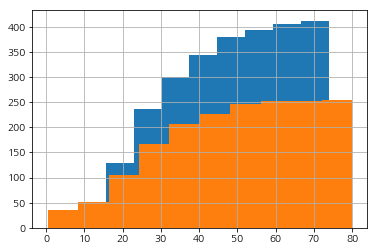

In [29]:
dead.Age.hist(cumulative='True')
survived.Age.hist(cumulative='True')

In [30]:
survived.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          49
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       198
Embarked      0
dtype: int64

### => Age는 다음  범주로 나누면 될거같다.

16세 이하 : youngest
17 ~ 26 : young
27 ~ 36 : mid
37 ~ 62 : old
63세 이상 : oldest

In [31]:
train['young'] = train['Age']<=16
train['old'] = train['Age']>16

train[['young','old']].head()

,young,old
PassengerId,,
430,False,True
752,True,False
824,False,True
129,False,True
700,False,True


In [32]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       677
Embarked      0
inexst        0
inex          0
ex            0
young         0
old           0
dtype: int64

=> Age 전처리 완료

## (3)Name 전처리 : 호칭 추출 -> 원핫인코딩

In [33]:
def get_title(name):
    return name.split(",")[1].split(".")[0].strip()

train['Title'] = train['Name'].apply(get_title)

In [34]:
train['Title']

PassengerId
430          Mr
752      Master
824         Mrs
129        Miss
700          Mr
76           Mr
716          Mr
777          Mr
11         Miss
206        Miss
252         Mrs
395         Mrs
1            Mr
3          Miss
5            Mr
6            Mr
8        Master
9           Mrs
13           Mr
14           Mr
15         Miss
17       Master
19          Mrs
20          Mrs
23         Miss
25         Miss
26          Mrs
27           Mr
29         Miss
30           Mr
         ...   
31          Don
35           Mr
36           Mr
65           Mr
84           Mr
156          Mr
169          Mr
188          Mr
257         Mrs
271          Mr
291        Miss
296          Mr
376         Mrs
384         Mrs
448          Mr
468          Mr
494          Mr
508          Mr
514         Mrs
546          Mr
556          Mr
603          Mr
605          Mr
608          Mr
634          Mr
695         Col
767          Dr
794          Mr
823    Jonkheer
843        Miss
Name: Title,

In [35]:
train.Title.unique()

array(['Mr', 'Master', 'Mrs', 'Miss', 'Rev', 'Dr', 'Ms', 'Lady', 'Sir',
       'Col', 'Capt', 'Mme', 'Mlle', 'Major', 'the Countess', 'Don',
       'Jonkheer'], dtype=object)

In [36]:
train.Title.value_counts()

Mr              501
Miss            160
Mrs             113
Master           38
Rev               6
Dr                6
Major             2
Col               2
Mlle              2
Ms                1
Lady              1
Sir               1
Don               1
Capt              1
Mme               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [37]:
# 호칭 이상치 제거 함수(핵심 호칭_Mr,Miss,Mrs,Master만 남기고, 나머지는 other)
def get_title2(name):
    title = name.split(",")[1].split(".")[0].strip()
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else :
        return 'other'

In [38]:
# train 셋의 'Title' 가져와서 호칭&other로 바꾸기
train['Title'] = train['Name'].apply(get_title2)

In [39]:
train.Title.unique()

array(['Mr', 'Master', 'Mrs', 'Miss', 'other'], dtype=object)

#### Title별 Survived 생존율 -> Title과 Survived는 상관관계 있다.
#### -> Title 원핫인코딩 실행

In [40]:
train.groupby('Title')['Survived'].mean()

Title
Master    0.552632
Miss      0.662500
Mr        0.153693
Mrs       0.778761
other     0.423077
Name: Survived, dtype: float64

In [41]:
train['Title_Mr'] = train['Title'] == 'Mr'
train['Title_Mrs'] = train['Title'] == 'Mrs'
train['Title_Miss'] = train['Title'] == 'Miss'
train['Title_Master'] = train['Title'] == 'Master'
train['Title_other'] = train['Title'] == 'other'

train[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
430,True,False,False,False,False
752,False,False,False,True,False
824,False,True,False,False,False
129,False,False,True,False,False
700,True,False,False,False,False


## (4) 성별(Sex) 원핫인코딩

In [42]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.717857
male      0.182796
Name: Survived, dtype: float64

In [43]:
train['Sex_M'] = train['Sex'] == 'male'
train['Sex_W'] = train['Sex'] == 'female'

train[['Sex_M', 'Sex_W']].head()

,Sex_M,Sex_W
PassengerId,,
430,True,False
752,True,False
824,False,True
129,False,True
700,True,False


In [44]:
# train.loc[train['Sex'] == 'male', 'Sex_revised'] = 0
# train.loc[train['Sex'] == 'female', 'Sex_revised'] = 1

# train['Sex_revised'].head()

## (5) Embarked 원핫인코딩

In [45]:
# EMbarked도 Survived와 상관관계가 있다.
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.517986
Q    0.397436
S    0.322061
Name: Survived, dtype: float64

In [46]:
## Embarked의 null값 채우기
train.loc[train.Embarked.isnull(), 'Embarked'] = 'C'

In [47]:
train.isnull().sum() 

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           677
Embarked          0
inexst            0
inex              0
ex                0
young             0
old               0
Title             0
Title_Mr          0
Title_Mrs         0
Title_Miss        0
Title_Master      0
Title_other       0
Sex_M             0
Sex_W             0
dtype: int64

In [48]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

train[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
430,False,True,False
752,False,True,False
824,False,True,False
129,True,False,False
700,False,True,False


## (6) SibSp, Parch 전처리 -> FamilySize로 합친 후 원핫인코딩

In [49]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [50]:
train.groupby('FamilySize')['Survived'].mean()

FamilySize
0     0.287908
1     0.534247
2     0.569892
3     0.727273
4     0.076923
5     0.055556
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [51]:
train.loc[train['FamilySize']<=1, 'Family_cl'] = 'Single'
train.loc[(train['FamilySize']>=2)&(train['FamilySize']<5), 'Family_cl'] = 'Nuclear'
train.loc[train['FamilySize']>=5, 'Family_cl'] = 'Big'
train[['FamilySize', 'Family_cl']].head(10)

,FamilySize,Family_cl
PassengerId,,
430,0,Single
752,1,Single
824,1,Single
129,2,Nuclear
700,0,Single
76,0,Single
716,0,Single
777,0,Single
11,2,Nuclear


In [52]:
train['Family_cl_S'] = train['Family_cl'] == 'Single'
train['Family_cl_N'] = train['Family_cl'] == 'Nuclear'
train['Family_cl_B'] = train['Family_cl'] == 'Big'

train[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
430,True,False,False
752,True,False,False
824,True,False,False
129,False,True,False
700,True,False,False


## (7) Cabin

In [53]:
train['Cabin'] = train['Cabin'].str[:1]

In [54]:
pd.pivot_table(data=train, index=['Pclass', 'Cabin'], values='Survived')
# P1, C null -> 

Survived
Pclass Cabin          
1      A      0.466667
       B      0.656250
       C      0.611111
       D      0.769231
       E      0.695652
       T      0.000000
2      D      0.750000
       E      0.750000
       F      0.875000
3      E      1.000000
       F      0.200000
       G      0.500000

In [55]:
# train['Cabin'][(train['Cabin'].isnull()) & (train['Pclass']==1)] 

In [56]:
train.loc[(train.Cabin.isnull())&(train.Pclass==1),  'Cabin'] = 'B'
train.loc[(train.Cabin.isnull())&(train.Pclass==2),  'Cabin'] = 'F'
train.loc[(train.Cabin.isnull())&(train.Pclass==3),  'Cabin'] = 'G'

In [57]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00000,0,0,SOTON/O.Q. 392078,8.0500,E,...,True,False,False,True,False,0,Single,True,False,False
752,1,3,"Moor, Master. Meier",male,6.00000,0,1,392096,12.4750,E,...,True,False,False,True,False,1,Single,True,False,False
824,1,3,"Moor, Mrs. (Beila)",female,27.00000,0,1,392096,12.4750,E,...,False,True,False,True,False,1,Single,True,False,False
129,1,3,"Peter, Miss. Anna",female,25.14062,1,1,2668,22.3583,F,...,False,True,True,False,False,2,Nuclear,False,True,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00000,0,0,348121,7.6500,F,...,True,False,False,True,False,0,Single,True,False,False


In [58]:
train[train.Cabin.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,


## X_test 전처리

### test셋도 train셋과 똑같이 맞춰준다. 
(1) null값 채우기

In [59]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [60]:
# null값 채우기
# (1) Pclass별 평균값 구하기 - groupby 이용 통계값 구하기
mean_by_P = train.groupby('Pclass')['Age'].mean()

In [61]:
mean_by_P

Pclass
1    40.416667
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [62]:
# (2) Age null값에 Pclass별로 평균값 넣기
test.loc[(test.Age.isnull())&(test.Pclass==1), 'Age'] = mean_by_P[1]
test.loc[(test.Age.isnull())&(test.Pclass==2), 'Age'] = mean_by_P[2]
test.loc[(test.Age.isnull())&(test.Pclass==3), 'Age'] = mean_by_P[3]

In [63]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [64]:
train['Fare'].mean()

22.411942482100223

In [65]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [66]:
test[test.Fare.isnull()==True]['Fare']

PassengerId
1044   NaN
Name: Fare, dtype: float64

### (★조건에 맞는 값을 넣는 것은 ★loc를 이용해라!)

In [67]:
test.loc[test.Fare.isnull()==True,'Fare'] = train['Fare'].mean()

In [68]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [69]:
test.loc[(test.Cabin.isnull())&(test.Pclass==1),  'Cabin'] = 'B'
test.loc[(test.Cabin.isnull())&(test.Pclass==2),  'Cabin'] = 'F'
test.loc[(test.Cabin.isnull())&(test.Pclass==3),  'Cabin'] = 'G'

In [70]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [71]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S


(2) 원핫 인코딩 해주기 : Age / Name(Title) / Sex / Embarked / SibSp&Parch

In [72]:
# Fare 원핫인코딩
test['inexst'] = test['Fare']<10.5
test['inex'] = (test['Fare']>=10.5) & (test['Fare']<80)
test['ex'] = test['Fare']>=80

train[['inexst', 'inex', 'ex']].head()

,inexst,inex,ex
PassengerId,,,
430,True,False,False
752,False,True,False
824,False,True,False
129,False,True,False
700,True,False,False


In [73]:
# 1. Age
# young, junior, senior, old 으로 나눠서 원핫인코딩 하기
test['young'] = test['Age']<=16
test['old'] = test['Age']>16

test[['young','old']].head()

,young,old
PassengerId,,
892,False,True
893,False,True
894,False,True
895,False,True
896,False,True


In [74]:
# 2. Name
test['Title'] = test['Name'].apply(get_title2)

In [75]:
train.groupby('Title')['Survived'].mean()

Title
Master    0.552632
Miss      0.662500
Mr        0.153693
Mrs       0.778761
other     0.423077
Name: Survived, dtype: float64

In [76]:
test['Title_Mr'] = test['Title'] == 'Mr'
test['Title_Mrs'] = test['Title'] == 'Mrs'
test['Title_Miss'] = test['Title'] == 'Miss'
test['Title_Master'] = test['Title'] == 'Master'
test['Title_other'] = test['Title'] == 'other'

test[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
892,True,False,False,False,False
893,False,True,False,False,False
894,True,False,False,False,False
895,True,False,False,False,False
896,False,True,False,False,False


In [77]:
# 3. Sex
test['Sex_M'] = test['Sex'] == 'male'
test['Sex_W'] = test['Sex'] == 'female'

test[['Sex_M', 'Sex_W']].head()

,Sex_M,Sex_W
PassengerId,,
892,True,False
893,False,True
894,True,False
895,True,False
896,False,True


In [78]:
# 4. Sex
# test.loc[test['Sex'] == 'male', 'Sex_revised'] = 0
# test.loc[test['Sex'] == 'female', 'Sex_revised'] = 1
# test['Sex_revised'].head()

In [79]:
# 5. Embarked
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

test[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
892,False,False,True
893,False,True,False
894,False,False,True
895,False,True,False
896,False,True,False


In [80]:
# 6. SibSp, Parch
test['FamilySize'] = test['SibSp'] + test['Parch']

In [81]:
test.loc[test['FamilySize']<=1, 'Family_cl'] = 'Single'
test.loc[(test['FamilySize']>=2)&(test['FamilySize']<5), 'Family_cl'] = 'Nuclear'
test.loc[test['FamilySize']>=5, 'Family_cl'] = 'Big'

In [82]:
test['Family_cl_S'] = test['Family_cl'] == 'Single'
test['Family_cl_N'] = test['Family_cl'] == 'Nuclear'
test['Family_cl_B'] = test['Family_cl'] == 'Big'

test[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
892,True,False,False
893,True,False,False
894,True,False,False
895,True,False,False
896,False,True,False


In [83]:
test.shape

(418, 31)

# 학습1: 랜덤포레스트

### 피쳐 결정 & 데이터 나누기

In [84]:
train.shape

(838, 32)

In [85]:
train.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'inexst', 'inex', 'ex', 'young', 'old',
       'Title', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master',
       'Title_other', 'Sex_M', 'Sex_W', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'FamilySize', 'Family_cl', 'Family_cl_S', 'Family_cl_N',
       'Family_cl_B'],
      dtype='object')

In [86]:
feature_names = [
                'young','old',                                                            # 나이                 
                'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other',     # 결혼, 성별
                'Sex_M', 'Sex_W',                                                         # 성별
                'Embarked_C', 'Embarked_S', 'Embarked_Q',                  
                'Family_cl_S', 'Family_cl_N','Family_cl_B',                               # 가족수                 
                'Pclass',                                                                 # 계급                
                'inexst', 'inex', 'ex',                                                   # Fare
#                 'Cabin'
                ]

In [87]:
X_train= train[feature_names]

In [88]:
X_test= test[feature_names]
test.shape

(418, 31)

In [89]:
y_train = train['Survived']
print(y_train.shape)

(838,)


In [90]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00000,0,0,SOTON/O.Q. 392078,8.0500,E,...,True,False,False,True,False,0,Single,True,False,False
752,1,3,"Moor, Master. Meier",male,6.00000,0,1,392096,12.4750,E,...,True,False,False,True,False,1,Single,True,False,False
824,1,3,"Moor, Mrs. (Beila)",female,27.00000,0,1,392096,12.4750,E,...,False,True,False,True,False,1,Single,True,False,False
129,1,3,"Peter, Miss. Anna",female,25.14062,1,1,2668,22.3583,F,...,False,True,True,False,False,2,Nuclear,False,True,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00000,0,0,348121,7.6500,F,...,True,False,False,True,False,0,Single,True,False,False


### 모델: 랜덤포레스트

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
forest 

# <RF 파라미터 설명>
# n_estimators: (가용한 시간, 메모리 안에서) 숫자 클수록 Score up.(더 많은 트리->과대적합 down)
# n_jobs = -1 : cpu core를 모두 사용하라(2 : 2개의 core를 사용해라)
# random_state=2018 : 랜덤포레스트 돌릴 때마다 항상 같은 score를 가지도록.(파라미터 튜닝 위해)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

### fit

In [93]:
# feature 행렬 데이터와 sentiment 벡터 데이터를 넣어서 랜덤 포레스트 학습을 시킨다.
%time forest = forest.fit(X_train, y_train)

Wall time: 152 ms


In [94]:
# 학습시킨 데이터를 Cross Validation해서 스코어 내기(ROC 커브 활용해서)
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, X_train, y_train, cv=10, scoring='roc_auc'))

# 예측 정확도는?
score

Wall time: 4.46 s


0.832974891608996

# 예측

In [95]:
# 테스트 데이터를 넣고 sentiment를 예측한다. 앞 10개만 보자.
y_pred = forest.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [96]:
submit = pd.read_csv("data/gender_submission.csv", index_col='PassengerId')

In [97]:
print(X_test.shape)
print(y_pred.shape)
print(submit.shape)

(418, 19)
(418,)
(418, 1)


In [98]:
submit['Survived'] = forest.predict(X_test)

In [100]:
submit.to_csv('data/submit_{0:4f}.csv'.format(score))

# 학습2 : 디시젼트리
- max-depth : 5 -> 7

In [ ]:
from IPython.display import Image
Image("image/의사결정나무_장단점.PNG")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
seed = 7
model = DecisionTreeClassifier(max_depth=5,
                              random_state=seed)

In [ ]:
deci = model.fit(X_train, y_train)
deci

In [ ]:
# 학습시킨 데이터를 Cross Validation해서 스코어 내기(ROC 커브 활용해서)
from sklearn.model_selection import cross_val_score 
%time score = np.mean(cross_val_score(\
    deci, X_train, \
    y_train, cv=10, scoring='roc_auc'))

In [ ]:
# 예측 정확도는?
score

In [ ]:
import graphviz                         # !pip install graphviz
from sklearn.tree import export_graphviz
import os

In [ ]:
export_graphviz(model,                     # graphviz 디시젼트리 모델 파일(dot) 만들기                         
                feature_names = feature_names,
                class_names = ['Dead', 'Survived'],
                out_file='decision-tree.dot')

In [ ]:
with open('decision-tree.dot') as f:    # graphviz로 트리 그리기
      dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:20]

#### submission 파일에 예측값을 넣어서 저장

#### submission.csv 파일 가져오기

In [ ]:
submit = pd.read_csv("data/gender_submission.csv",
                     index_col='PassengerId')

In [ ]:
# 랜덤값
submit.head()

In [ ]:
# 예측값 넣기
submit['Survived'] = model.predict(X_test)

In [ ]:
submit.head(10)

In [ ]:
submit.to_csv('data/submit.csv')